# Tarea - Realizar graficas donde se comparen diferentes mediciones para tratar de identificar algun patron

In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
import emcee
import pandas as pd
import corner
from pandasql import sqldf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib import pyplot

In [2]:
data = pd.read_csv(f'/home/luiscantero/anadat/Archivos/Semana13/result2')
data.keys()

/home/luiscantero/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (69,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['decals_id', 'ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'mjd_min',
       'mjd_max', 'htm9',
       ...
       'nobs_r', 'nobs_z', 'anymask_g', 'anymask_r', 'anymask_z', 'allmask_g',
       'allmask_r', 'allmask_z', 'brickname', 'type'],
      dtype='object', length=115)

In [3]:
data

,decals_id,ra,dec,elon,elat,glon,glat,mjd_min,mjd_max,htm9,...,nobs_r,nobs_z,anymask_g,anymask_r,anymask_z,allmask_g,allmask_r,allmask_z,brickname,type
0,5497595108656072,286.578976,44.694369,300.428869,66.391005,75.298153,16.240068,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
1,5497595108656071,286.581590,44.694554,300.433448,66.390655,75.299066,16.238419,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
2,5497595108656189,286.592264,44.700596,300.455895,66.394298,75.307890,16.233697,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
3,5497595108656176,286.588875,44.699958,300.449675,66.394369,75.306322,16.235683,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
4,5497595108656067,286.586210,44.700882,300.445793,66.395793,75.306463,16.237786,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
5,5497595108656191,286.593603,44.703107,300.459954,66.396436,75.310686,16.233771,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,REX
6,5497595108656203,286.579200,44.701010,300.433950,66.397328,75.304615,16.242444,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
7,5497595108656270,286.584390,44.706226,300.446478,66.401283,75.311099,16.241013,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
8,5497595108656114,286.574717,44.696365,300.423030,66.393776,75.298878,16.243627,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
9,5497595108656113,286.573210,44.696454,300.420528,66.394165,75.298540,16.244651,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF


In [4]:
tipos = np.array(['PSF', 'REX', 'DEV', 'EXP', 'COMP'])
tipos

array(['PSF', 'REX', 'DEV', 'EXP', 'COMP'], dtype='<U4')

In [5]:
def separa(columna):
    psf = []
    rex = []
    dev = []
    exp = []
    comp = []
    for i in range (0, len(tipos)):
        for j in range (0, len(columna)):
            if columna[j] != 'nan':
                if data.type[j] == 'PSF':
                    psf.append(columna[j])
                if data.type[j] == 'REX':
                    rex.append(columna[j])
                if data.type[j] == 'DEV':
                    dev.append(columna[j])    
                if data.type[j] == 'EXP':
                    exp.append(columna[j])
                if data.type[j] == 'COMP':
                    comp.append(columna[j])    
    return np.array([psf,rex,dev,exp,comp])     

def separa2(columna1, li, ls, columna2, li2, ls2):
    hola = []
    hola2 = []
    for i in range (0, len(columna1)):
        if columna1[i]> li:
            if columna1[i]< ls:
                if columna2[i]>li2:
                    if columna2[i]<ls2:
                        hola.append(columna1[i])
                        hola2.append(columna2[i])
    return hola, hola2        

def separa3(columna1, li, ls, columna2, li2, ls2, columna3):
    hola = []
    hola2 = []
    hola3 = []
    
    for i in range (0, len(columna1)):
        if columna1[i]> li:
            if columna1[i]< ls:
                if columna2[i]>li2:
                    if columna2[i]<ls2:
                        hola.append(columna1[i])
                        hola2.append(columna2[i])
                        hola3.append(columna3[i])
    return hola, hola2, hola3        

In [6]:
rarad = data.ra*3.141592653/180

In [7]:
decrad = data.dec*3.141592653/180

Text(0,0.5,'Declinacion (Dec)')

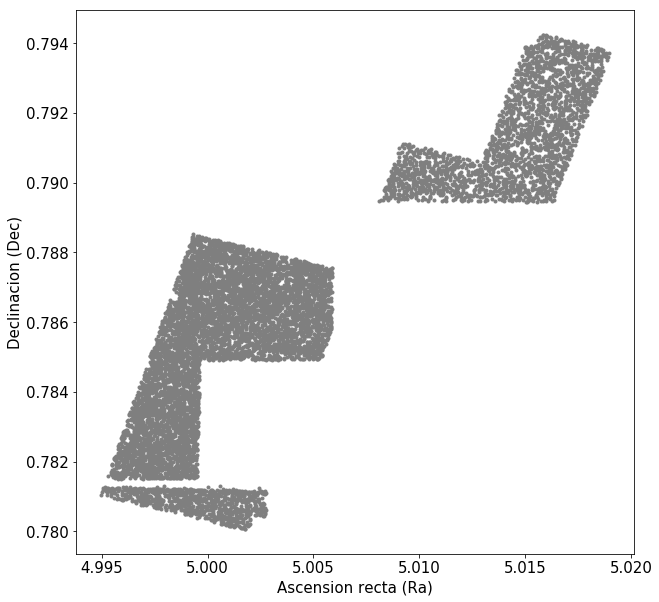

In [8]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size':15})
plt.plot(rarad, decrad, '.', color = 'tab:gray')

plt.xlabel("Ascension recta (Ra)") 
plt.ylabel("Declinacion (Dec)")

In [9]:
li1=4.998
ls1=5.004
li2=.785
ls2=.787

rafiltro,decfiltro =  separa2(rarad,li1,ls1,decrad,li2,ls2)
x = np.cos(rafiltro)*np.sin(decfiltro)
y = np.sin(rafiltro)*np.sin(decfiltro)
z = np.cos(decfiltro)






In [10]:
li1 = min(x)

In [11]:
ls1 = max(x)

In [12]:
li2 = min(y)

In [13]:
ls2 = max(y)

In [14]:
li3 = min(z)

In [15]:
ls3 = max(z)

In [16]:
ranx = np.random.uniform(li1,ls1,len(x))
rany = np.random.uniform(li2,ls2,len(y))
ranz = np.random.uniform(li3,ls3,len(z))

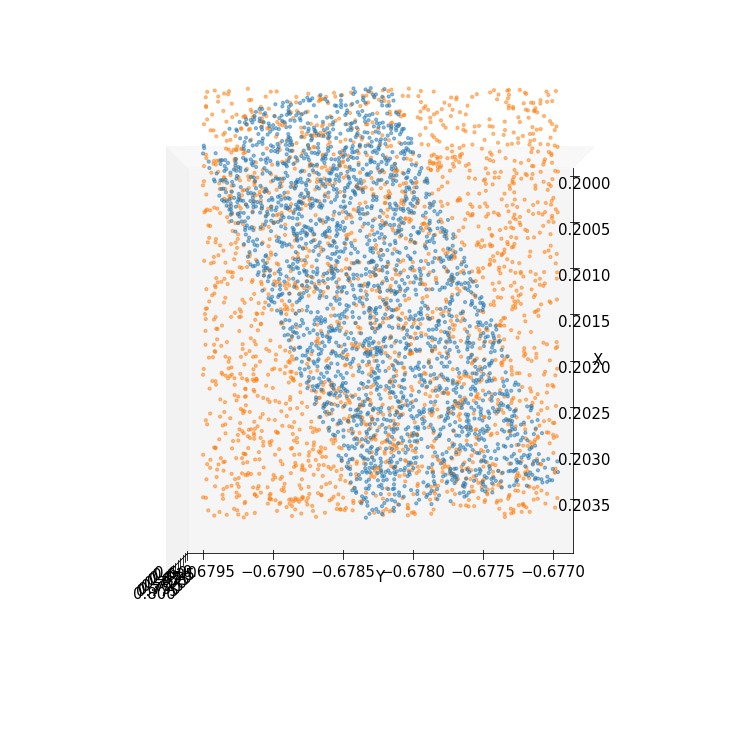

In [17]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size':15})
ax = Axes3D(fig)
ax.grid(False)
ax.scatter(x, y, z, s=10, alpha = 0.5)
ax.scatter(ranx, rany, ranz, s=10, alpha = 0.5)


ax.set_xlabel("X") 
ax.set_ylabel("Y")
ax.view_init(15, 30)
ax.set_xlim([.2, .204])
#ax.set_ylim([-.677, -.680])
ax.set_zlim([.6, .8])

ax.view_init(90, 0)

In [18]:
li = .202
ls = .230
lii = -.6783
lss = -.6775

x2, y2, z2 =  separa3(x,li,ls,y,lii,lss, z)

ranx2 = np.random.uniform(min(x2),max(x2),len(x2))
rany2 = np.random.uniform(min(y2),max(y2),len(y2))
ranz2 = np.random.uniform(min(z2),max(z2),len(z2))

ranx3 = np.random.uniform(min(x2),max(x2),len(x2))
rany3 = np.random.uniform(min(y2),max(y2),len(y2))
ranz3 = np.random.uniform(min(z2),max(z2),len(z2))



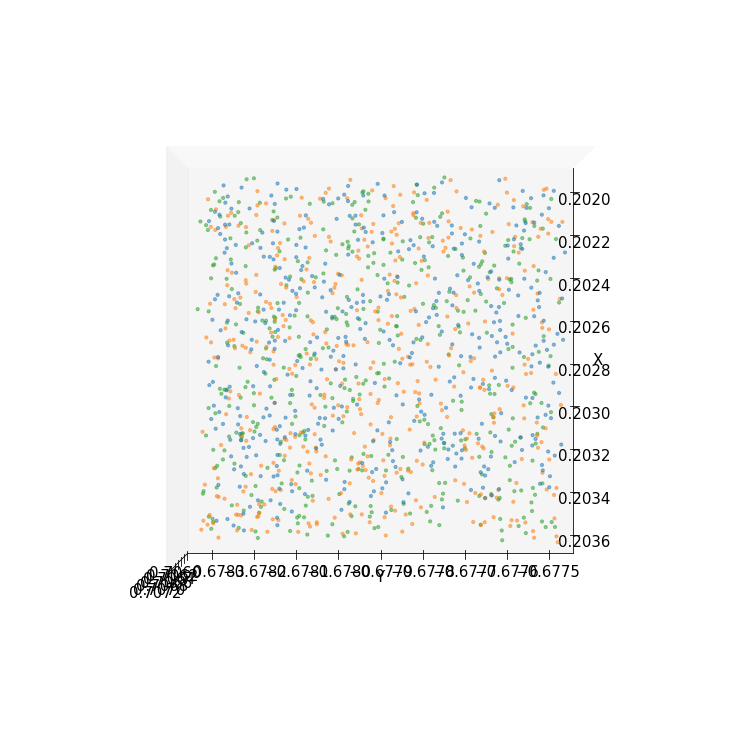

In [34]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size':15})
ax = Axes3D(fig)
ax.grid(False)
z 
ax.scatter(x2, y2, z2, s=10, alpha = 0.5)
ax.scatter(ranx2, rany2, ranz2, s=10, alpha = 0.5)
ax.scatter(ranx3, rany3, ranz3, s=10, alpha = 0.5)



ax.view_init(15, 30)
#ax.set_xlim([.2, .204])
#ax.set_ylim([-.677, -.680])
#ax.set_zlim([.6, .8])

ax.set_xlabel("X") 
ax.set_ylabel("Y")

ax.view_init(90, 0)

In [20]:
def distancia(x1,y1, z1):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2 + (z1[i] - z1[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

In [21]:
d1 = distancia(x2, y2, z2)
r1 = distancia(ranx2, rany2, ranz2)
r2 = distancia(ranx3, rany3, ranz3)


In [22]:
dd, nbm = np.histogram(d1, bins = 10)
rr, nbr = np.histogram(r1, bins = 10)
rr2, nbr2 = np.histogram(r2, bins = 10)


In [23]:
co = dd / rr - 1
co2 = rr / rr2 - 1


(array([  866.,  3689.,  7788., 10927., 13136., 14080., 12965., 10533.,
         8267.,  5508.,  3916.,  2187.,   759.,   194.,    15.]),
 array([1.84958871e-05, 1.49208010e-04, 2.79920133e-04, 4.10632255e-04,
        5.41344378e-04, 6.72056501e-04, 8.02768624e-04, 9.33480746e-04,
        1.06419287e-03, 1.19490499e-03, 1.32561711e-03, 1.45632924e-03,
        1.58704136e-03, 1.71775348e-03, 1.84846561e-03, 1.97917773e-03]),
 <a list of 15 Patch objects>)

<Figure size 720x720 with 0 Axes>

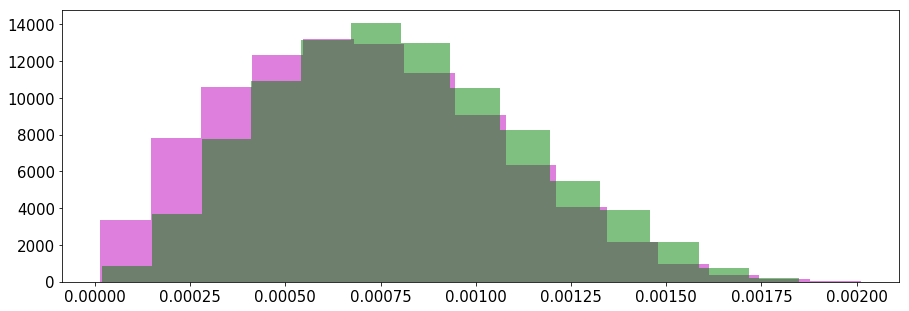

In [24]:
nb = 15
lmax = max(d1)
x = np.linspace(0, lmax, len(co))
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(d1, bins=nb, color = 'm' , alpha =0.5, label='$DD$')
plt.hist(r1, bins=nb, color = 'g' , alpha =0.5, label='$RR$')

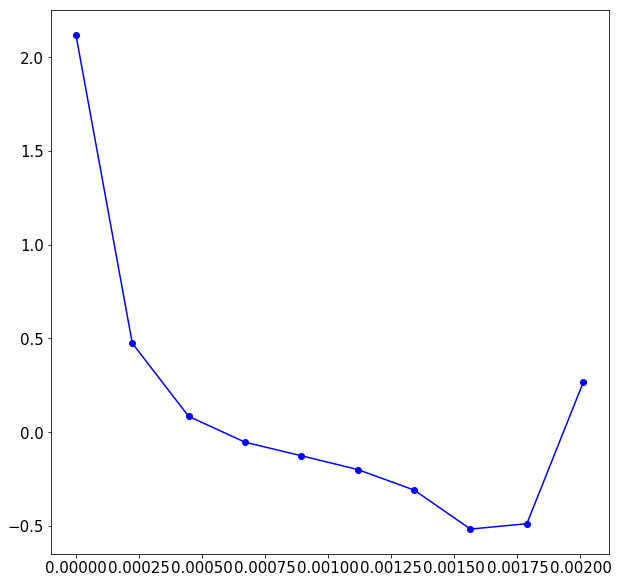

In [25]:
plt.plot(x, co, 'bo-')

In [26]:
def distanciadr(x1,y1,z1, xr, yr, zr):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - xr[j]) ** 2 + (y1[i] - yr[j]) ** 2 + (z1[i] - zr[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

In [27]:
ddr = distanciadr(x2, y2, z2, ranx2, rany2, ranz2) 

In [28]:
dr, nbrd = np.histogram(ddr, bins = 10)

In [29]:
len(dr)

10

In [30]:
co2 = (dd - 2*dr + rr)/rr

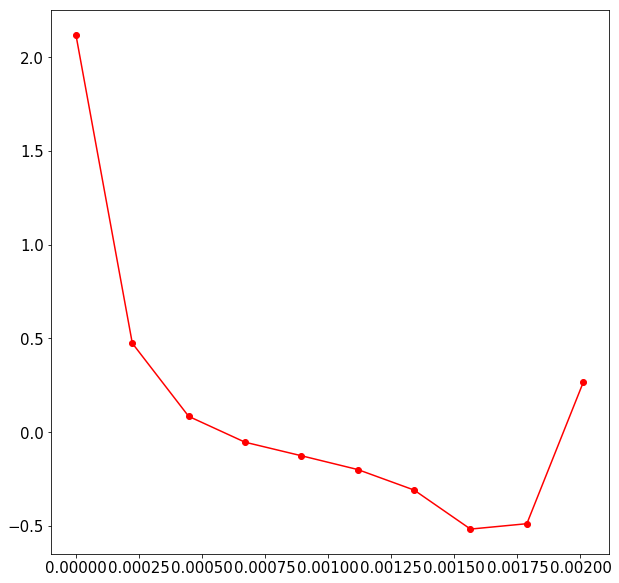

In [31]:
plt.plot(x, co, 'bo-', color = 'r')

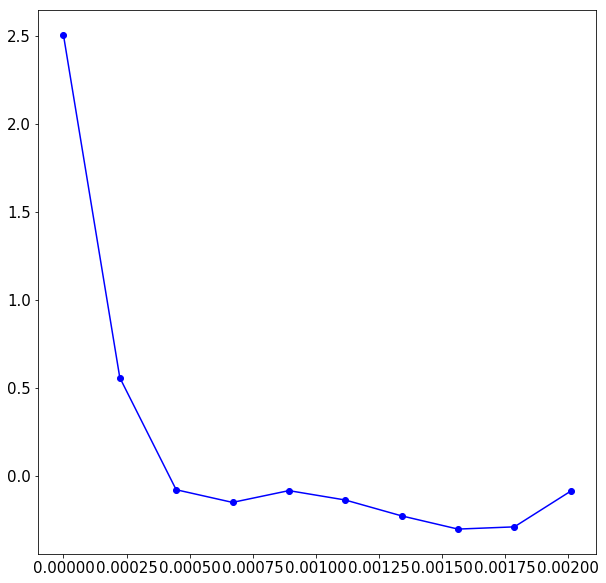

In [32]:
plt.plot(x, co2, 'bo-')